<a href="https://colab.research.google.com/github/lovenalee/Final-Project/blob/master/MajCrimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install require package

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz
!tar xf spark-3.0.2-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
# require dependencies

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop2.7"

In [3]:
# bring in pyspark

import findspark
findspark.init()

In [4]:
# create pyspark session

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Basics").getOrCreate()

In [5]:
# identify data file

df = spark.read.csv("MCI_2014_to_2019.csv", sep=",", header=True, inferSchema=True)

In [6]:
# show data set

df.show(truncate=False)

+-----------------+----------------+------+---------------+----------------------+----------------------+-----------+--------+-------+------------------------------+------------+-------------+-----------+-----------------+-----------------+------------+--------------+---------------+-------------+-------------------+-------------------+--------------+---------------+--------+-------+-------------------------------+----------+-------+--------+
|X                |Y               |Index_|event_unique_id|occurrencedate        |reporteddate          |premisetype|ucr_code|ucr_ext|offence                       |reportedyear|reportedmonth|reportedday|reporteddayofyear|reporteddayofweek|reportedhour|occurrenceyear|occurrencemonth|occurrenceday|occurrencedayofyear|occurrencedayofweek|occurrencehour|MCI            |Division|Hood_ID|Neighbourhood                  |Lat       |Long   |ObjectId|
+-----------------+----------------+------+---------------+----------------------+----------------------+-

In [7]:
# check data type of data set

df.dtypes

[('X', 'double'),
 ('Y', 'double'),
 ('Index_', 'int'),
 ('event_unique_id', 'string'),
 ('occurrencedate', 'string'),
 ('reporteddate', 'string'),
 ('premisetype', 'string'),
 ('ucr_code', 'int'),
 ('ucr_ext', 'int'),
 ('offence', 'string'),
 ('reportedyear', 'int'),
 ('reportedmonth', 'string'),
 ('reportedday', 'int'),
 ('reporteddayofyear', 'int'),
 ('reporteddayofweek', 'string'),
 ('reportedhour', 'int'),
 ('occurrenceyear', 'int'),
 ('occurrencemonth', 'string'),
 ('occurrenceday', 'int'),
 ('occurrencedayofyear', 'int'),
 ('occurrencedayofweek', 'string'),
 ('occurrencehour', 'int'),
 ('MCI', 'string'),
 ('Division', 'string'),
 ('Hood_ID', 'int'),
 ('Neighbourhood', 'string'),
 ('Lat', 'double'),
 ('Long', 'double'),
 ('ObjectId', 'int')]

In [58]:
# check the data

print(df.shape[0], 'rows', 'AND', df.shape[1], 'columns')


AttributeError: ignored

In [8]:
# bring in pyspark dependencies for data munging

from pyspark.sql import functions as func
from pyspark.sql.functions import *
df.select("reporteddate").dtypes
df1 = df.withColumn('date_only', split(df['reporteddate'], ' ').getItem(0))
df1.show(truncate=False)

+-----------------+----------------+------+---------------+----------------------+----------------------+-----------+--------+-------+------------------------------+------------+-------------+-----------+-----------------+-----------------+------------+--------------+---------------+-------------+-------------------+-------------------+--------------+---------------+--------+-------+-------------------------------+----------+-------+--------+----------+
|X                |Y               |Index_|event_unique_id|occurrencedate        |reporteddate          |premisetype|ucr_code|ucr_ext|offence                       |reportedyear|reportedmonth|reportedday|reporteddayofyear|reporteddayofweek|reportedhour|occurrenceyear|occurrencemonth|occurrenceday|occurrencedayofyear|occurrencedayofweek|occurrencehour|MCI            |Division|Hood_ID|Neighbourhood                  |Lat       |Long   |ObjectId|date_only |
+-----------------+----------------+------+---------------+----------------------+--

In [9]:
# make unique record by grouping and counting each reported date in the 'reporteddate' field

grouped_df = df1.groupBy("date_only").count()
grouped_df.sort(func.col("date_only")).show(truncate=False)

+----------+-----+
|date_only |count|
+----------+-----+
|2014/01/01|100  |
|2014/01/02|65   |
|2014/01/03|53   |
|2014/01/04|64   |
|2014/01/05|74   |
|2014/01/06|68   |
|2014/01/07|92   |
|2014/01/08|86   |
|2014/01/09|82   |
|2014/01/10|64   |
|2014/01/11|62   |
|2014/01/12|92   |
|2014/01/13|80   |
|2014/01/14|82   |
|2014/01/15|68   |
|2014/01/16|74   |
|2014/01/17|94   |
|2014/01/18|94   |
|2014/01/19|70   |
|2014/01/20|80   |
+----------+-----+
only showing top 20 rows



In [24]:
# bring in pandas dependencies for data munging

import pandas as pd
import matplotlib.pyplot as plt

pandas_df = grouped_df.toPandas()
pandas_df.dtypes
pandas_df = pandas_df.rename(columns={"date_only": "ds", "count": "y"})
pandas_df['ds'] = pd.to_datetime(pandas_df['ds'], format='%Y-%m-%d')
pandas_df = pandas_df.sort_values(by=['ds'])
pandas_df = pandas_df.reset_index(drop=True)
pandas_df.head()

,ds,y
0,2014-01-01,100
1,2014-01-02,65
2,2014-01-03,53
3,2014-01-04,64
4,2014-01-05,74


In [65]:
# check pandas_df data type to ensure 'ds' is date format and check data for missing values

pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2191 non-null   datetime64[ns]
 1   y       2191 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 34.4 KB


In [68]:
print(pandas_df.shape[0], 'rows', 'AND', pandas_df.shape[1], 'columns')
print('Min Date', pandas_df.ds.min(), 'AND', 'Max Date', pandas_df.ds.max())

2191 rows AND 2 columns
Min Date 2014-01-01 00:00:00 AND Max Date 2019-12-31 00:00:00


In [27]:
# bring in prophet

from fbprophet import Prophet

model = Prophet()
model.fit(pandas_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
# plot the data on 2 years predictions

future_df = model.make_future_dataframe(periods=730)

In [29]:
# data table with prediction yhat, lower and upper bounds (yhat_lower and yhat_upper), the trend, lower and upper trend values

predictions = model.predict(future_df)
predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head(366)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2014-01-01,74.042817,57.983348,90.944172,85.782903,85.782903,85.782903
1,2014-01-02,73.609668,57.915665,89.727399,85.787710,85.787710,85.787710
2,2014-01-03,77.301042,61.630975,93.667561,85.792516,85.792516,85.792516
3,2014-01-04,73.050849,56.271099,88.760356,85.797322,85.797322,85.797322
4,2014-01-05,73.673626,57.563777,89.446595,85.802129,85.802129,85.802129
...,...,...,...,...,...,...,...
361,2014-12-28,72.960284,57.770517,89.409642,87.518001,87.518001,87.518001
362,2014-12-29,78.951606,63.037348,94.748737,87.522807,87.522807,87.522807
363,2014-12-30,75.833269,58.907313,92.363037,87.527613,87.527613,87.527613
364,2014-12-31,75.430110,59.844154,90.667755,87.532420,87.532420,87.532420


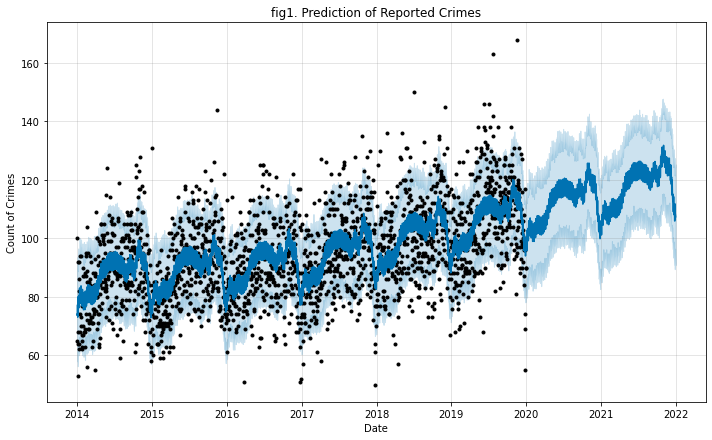

In [52]:
# plotting the predictions

fig1 = model.plot(predictions)
plt.title("fig1. Prediction of Reported Crimes")
plt.xlabel("Date")
plt.ylabel("Count of Crimes")
plt.show()

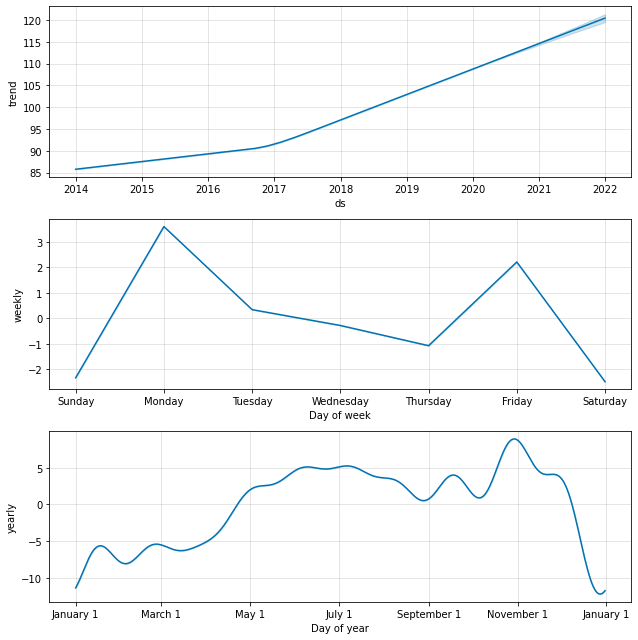

In [51]:
# plotting the prediction seasonality components

fig2 = model.plot_components(predictions)
plt.show()

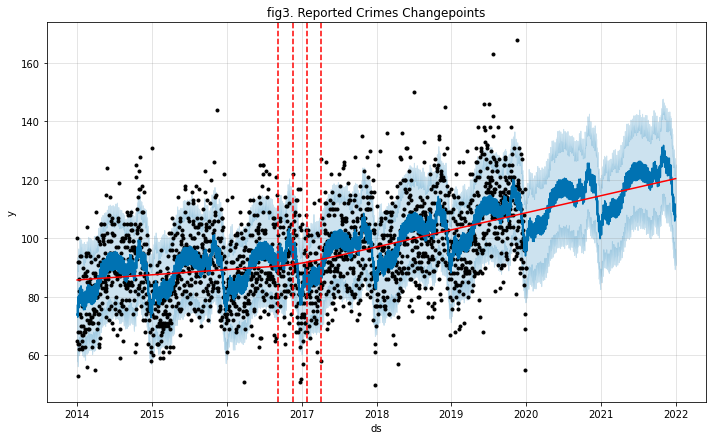

In [53]:
# plotting the changepoints of the data

from fbprophet.plot import add_changepoints_to_plot

fig3 = model.plot(predictions) 
a = add_changepoints_to_plot(fig3.gca(), model, predictions)
plt.title("fig3. Reported Crimes Changepoints")
plt.show()

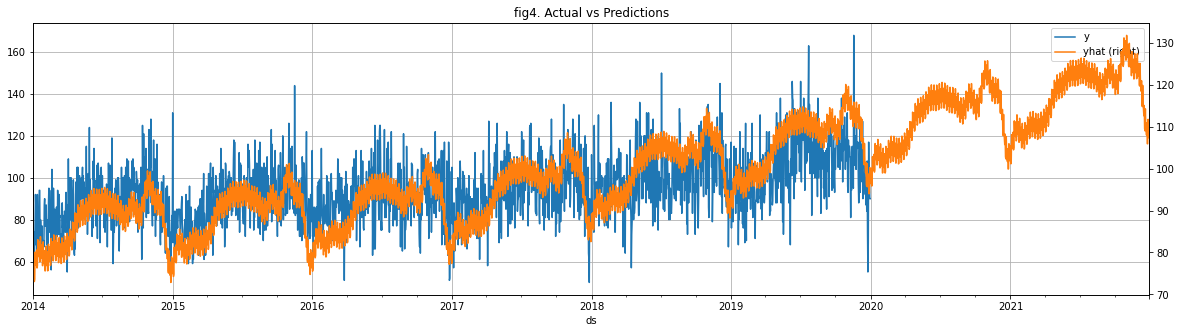

In [70]:
# plotting the actual and prediction values

fig4 = (pandas_df.plot(x='ds',y='y',figsize=(20,5)))
predictions.plot(x='ds',y='yhat',figsize=(20,5),title='fig4. Actual vs Predictions', grid=True, secondary_y=True, ax=fig4)
plt.show()